In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
Input = df.iloc[:, :-1]
Output = df.iloc[:, -1]

X = Input.to_numpy()
y = Output.to_numpy()

In [11]:
def check_performance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1004)
    # train set만을 이용해서 모형 학습
    rl= LinearRegression()
    rl.fit(X_train, y_train)
    # train set에서의 성능
    y_train_hat = rl.predict(X_train)
    print('train셋 MSE: ', mean_squared_error(y_train,y_train_hat))
    print('train셋 R^2: ', rl.score(X_train, y_train))
    # test set에서의 성능
    y_test_hat = rl.predict(X_test)
    print('*' *30)
    print('test셋 MSE: ', mean_squared_error(y_test,y_test_hat))

In [12]:
check_performance(X, y)

train셋 MSE:  22.928871857314128
train셋 R^2:  0.7282123460763663
******************************
test셋 MSE:  19.450267341373383


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(Input.values, i) for i in range(Input.shape[1])]
vif['features'] = Input.columns
vif

,VIF,features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


## Q1. 원하는 변수 2개를 가지고 'price' 예측하는 모델 만들기

#### sckit-learn 활용, R^2/MSE 계산

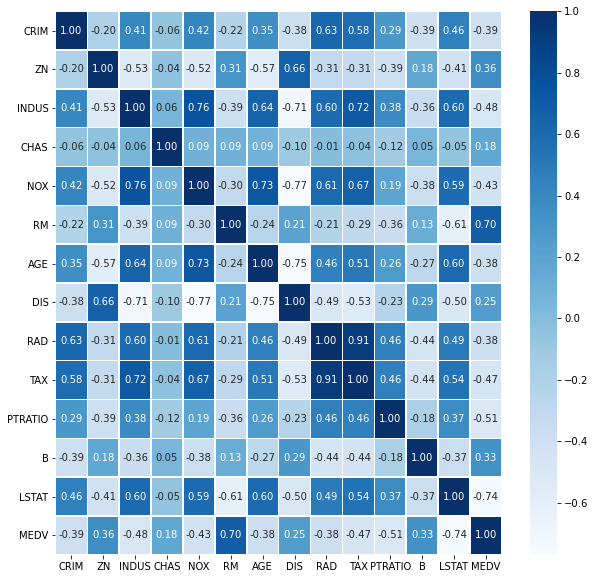

In [13]:
# 변수들 간의 상관관계 먼저 확인
plt.figure(figsize=(10, 10))

sns.heatmap(data = df.corr(), annot=True, 
            fmt = '.2f', linewidths=.5, cmap='Blues')

In [14]:
# 전진선택법으로 변수 2개 선택
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [15]:
fs = SFS(LinearRegression(),
           k_features=2, forward=True, floating=False, scoring = 'r2', cv = 0)

fs.fit(Input,Output)
pd.DataFrame.from_dict(fs.get_metric_dict()).T

/home/pirl/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pirl/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)",[0.5441462975864799],0.544146,"(LSTAT,)",NaN,0,NaN
2,"(5, 12)",[0.6385616062603403],0.638562,"(RM, LSTAT)",NaN,0,NaN


In [16]:
# 선택된 RM과 LSTAT변수를 가지고 regression
Input2 = df.iloc[:, [5, 12]]

X2 = Input2.to_numpy()

In [17]:
check_performance(X2, y)

train셋 MSE:  31.856370917022808
train셋 R^2:  0.6223901303152506
******************************
test셋 MSE:  25.28471810133068


In [ ]:
# 전체 변수 다 사용한 것과 비교했을 때, 성능이 더 떨어짐

## Q2. (같은 독립변수를 사용) Data pre-processing 등을 활용하여 앞의 모델보다 성능 높이기(MSE 기준), 왜 성능이 높아졌는지 간단하게 서술

#### outlier 제거(그림 그려서 확인하면 쉽게 확인 가능) 의 방법 존재

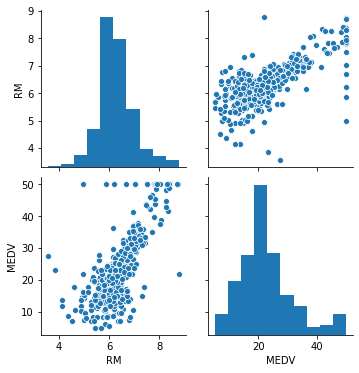

In [19]:
sns.pairplot(df[['RM','MEDV']])

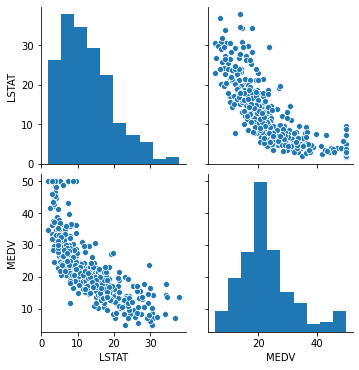

In [20]:
sns.pairplot(df[['LSTAT','MEDV']])

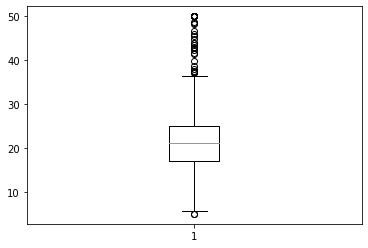

In [21]:
plt.boxplot(df['MEDV'])

plt.show()

In [ ]:
# 그래프를 확인한 결과, MEDV 데이터에 outlier가 존재

In [65]:
# outlier를 제거하고 다시 regression
not_outlier = df['MEDV'] < 36
df2 = df.loc[not_outlier, :]

In [66]:
Input3 = df2.iloc[:, [5, 12]]
Output3 = df2.iloc[:, -1]

X3 = Input3.to_numpy()
y3 = Output3.to_numpy()

In [67]:
check_performance(X3, y3)

train셋 MSE:  14.885394942533942
train셋 R^2:  0.6409932434607362
******************************
test셋 MSE:  14.76908165450357


In [34]:
# 후진 제거법 결과 확인 -> 전진 선택과 동일
bs2 = SFS(LinearRegression(),
           k_features=2, forward=False, floating=False,scoring = 'r2', cv = 0)

bs2.fit(Input,Output)
pd.DataFrame.from_dict(bs2.get_metric_dict()).T

/home/pirl/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pirl/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.7406426641094095],0.740643,"(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",NaN,0,NaN
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",[0.7406412165505145],0.740641,"(CRIM, ZN, INDUS, CHAS, NOX, RM, DIS, RAD, TAX...",NaN,0,NaN
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",[0.7405822802569575],0.740582,"(CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRAT...",NaN,0,NaN
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",[0.7352631473231818],0.735263,"(CRIM, ZN, NOX, RM, DIS, RAD, TAX, PTRATIO, B,...",NaN,0,NaN
9,"(0, 4, 5, 7, 8, 9, 10, 11, 12)",[0.7292543470977955],0.729254,"(CRIM, NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT)",NaN,0,NaN
8,"(0, 4, 5, 7, 8, 10, 11, 12)",[0.7239765998018791],0.723977,"(CRIM, NOX, RM, DIS, RAD, PTRATIO, B, LSTAT)",NaN,0,NaN
7,"(4, 5, 7, 8, 10, 11, 12)",[0.7187395846343028],0.71874,"(NOX, RM, DIS, RAD, PTRATIO, B, LSTAT)",NaN,0,NaN
6,"(4, 5, 7, 10, 11, 12)",[0.7153894128095097],0.715389,"(NOX, RM, DIS, PTRATIO, B, LSTAT)",NaN,0,NaN
5,"(4, 5, 7, 10, 12)",[0.7080892893529661],0.708089,"(NOX, RM, DIS, PTRATIO, LSTAT)",NaN,0,NaN
4,"(5, 7, 10, 12)",[0.6903077016842538],0.690308,"(RM, DIS, PTRATIO, LSTAT)",NaN,0,NaN


### 특정한 정답은 없으며, 문제가 원하는 답변에 충족하면 만점 처리

[참고자료]   
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python  
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard